In [1]:
#Librerías que utilicé
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt

## ¿Un menor interés por aprender está asociado con una conducta de obtener ganancias inmediatas per desventajosas?

In [2]:
#Aquí leo el csv llamado "data.csv"
calificaciones = pd.read_csv('data.csv',index_col=False)

In [3]:
#Muestro que mi información se haya cargado correctamente
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


In [4]:
#Asigno los nombres que quiero para las columnas del test
columnas = {'ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
calificaciones = calificaciones.rename(columns=columnas)
#Muestro mi dataset con las columnas renombradas
calificaciones.head(5)

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,uno,...,catorce,quince,dieciseis,diecisiete,dieciocho,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


In [5]:
#Excluyo para que solo me queden ahora las columnas de las calificaciones y las respuestas del test
calificaciones_part = calificaciones[['participant','uno','dos','tres','cuatro','cinco','seis',
                                'siete','ocho','nueve','diez','once','doce','trece','catorce','quince',
                                'dieciseis','diecisiete','dieciocho','igt:1']]

In [6]:
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,uno,...,catorce,quince,dieciseis,diecisiete,dieciocho,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


Aquí calculo la mediana de las calificaciones del TNC... para calcularla, tomé en cuenta TODAS las respuestas de los participantes y a partir de ahí saqué la mediana.

In [7]:
#Creo un nuevo dataset que me sirve para calular la media
calificaciones_media = calificaciones[['uno','dos','tres','cuatro','cinco','seis',
                                'siete','ocho','nueve','diez','once','doce','trece','catorce','quince',
                                'dieciseis','diecisiete','dieciocho','igt:1']]
calificaciones_media1 = calificaciones[['uno','dos','tres','cuatro','cinco','seis',
                                'siete','ocho','nueve','diez','once','doce','trece','catorce','quince',
                                'dieciseis','diecisiete','dieciocho']]

In [8]:
#Extraigo todos las respuestas del test
mediana = calificaciones_media1.values
#Calculo la mediana
mediana = np.median(mediana)
#Imprimo la mediana
print('La mediana es:',mediana)

La mediana es: 3.0


In [9]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
calificaciones_part['Promedio tnc'] = (calificaciones_part['uno'] + calificaciones_part['dos'] + calificaciones_part['tres']+calificaciones_part['cuatro']+
                                 calificaciones_part['cinco']+calificaciones_part['seis']+calificaciones_part['siete']+calificaciones_part['ocho']
                                 +calificaciones_part['nueve']+calificaciones_part['diez']+calificaciones_part['once']+calificaciones_part['doce']
                                 +calificaciones_part['trece']+calificaciones_part['catorce']+calificaciones_part['quince']
                                 +calificaciones_part['dieciseis']+calificaciones_part['diecisiete']+calificaciones_part['dieciocho'])/18

In [10]:
#Checo que se hayan cargado correctamente los promedios 
calificaciones_part.head()

,participant,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,...,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,igt:1,Promedio tnc
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,5,4,1,2,1,5,2,3,1,...,5,2,3,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,3.222222
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,4,4,2,4,3,2,2,1,2,...,4,2,5,4,4,3,2,2,NaN,3.000000
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,3,3,4,1,2,5,2,2,2,...,5,1,3,4,2,5,2,5,NaN,3.055556
3,s.26328d2c-466f-467e-9860-b27601337486.txt,1,3,3,2,3,4,2,4,5,...,4,4,4,2,5,3,4,3,NaN,3.333333
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,3,3,3,1,1,3,1,3,2,...,3,1,1,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,2.444444


In [11]:
calificaciones_part = calificaciones_part[['participant','Promedio tnc','igt:1']]

In [12]:
#Elimino las entradas de todos los participantes que NO hicieron el juego
calificaciones_media = calificaciones_part.dropna()

#Creando nuevas columnas para
#calificaciones_media['Veces ganadas'] = 0
calificaciones_media['Dinero final'] = 0

#Relleno las tablas con la información necesaria
for index,row in calificaciones_media.iterrows():
    x = calificaciones_media['igt:1'][index]
    juego = pd.read_csv(x,sep=' ',header=None)
    #ganadas = juego[2].sum()
    dinero = juego[4][int(len(juego)-1)] - juego[3][0]
    #calificaciones_media['Veces ganadas'][index] = ganadas
    calificaciones_media['Dinero final'][index] = dinero

In [13]:
#Aquí hago la segmentación de grupos por sobre y por de bajo de la mediana de respuestas con respecto a su respuesta promedio
interesados = calificaciones_media[calificaciones_media['Promedio tnc']>=3]
no_interesados = calificaciones_media[calificaciones_media['Promedio tnc']<3]

In [14]:
#Muestro que mi lista de interesados se haya guardado bien
interesados.head()

,participant,Promedio tnc,igt:1,Dinero final
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,3.222222,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,350
7,s.cac0f1e9-2b83-49a2-b44d-9eec69bea2df.txt,3.388889,igt.2020-01-15-1740.data.cac0f1e9-2b83-49a2-b4...,-400
9,s.9adf1fae-ab88-4f55-ae2d-2052062f60d8.txt,3.611111,igt.2020-01-15-1755.data.9adf1fae-ab88-4f55-ae...,-800
11,s.527029e5-e73d-4c89-b54f-e26f6864dc9b.txt,3.222222,igt.2020-01-15-1745.data.527029e5-e73d-4c89-b5...,0
12,s.81f74ce8-76dd-4519-92d5-f39b916a315e.txt,3.222222,igt.2020-01-15-1744.data.81f74ce8-76dd-4519-92...,-400


In [15]:
no_interesados.corr(method='pearson')

,Promedio tnc,Dinero final
Promedio tnc,1.00000,0.60222
Dinero final,0.60222,1.00000


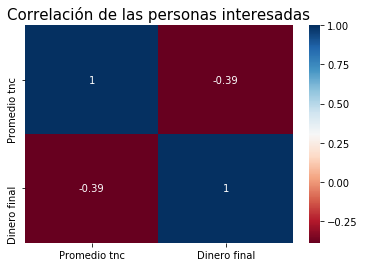

In [16]:
correlation_matrix=interesados.corr(method='pearson')
#Heatmap
sns.heatmap(correlation_matrix, annot=True,cmap='RdBu')
plt.title('Correlación de las personas interesadas',fontsize=15)
plt.show()

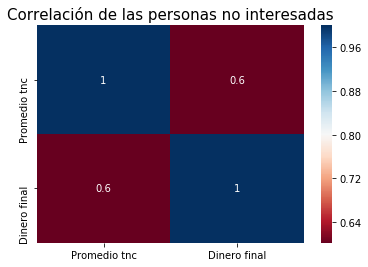

In [17]:
correlation_matrix=no_interesados.corr(method='pearson')
#Heatmap
sns.heatmap(correlation_matrix, annot=True,cmap='RdBu')
plt.title('Correlación de las personas no interesadas',fontsize=15)
plt.show()

# Conclusión 

Normalmente, es a partir de un coeficiente de correlación por encima de 0.8 que se considera como "alta".

Podemos decir que en efecto existe una correlación negativa entre el promedio registrado en el tnc y la cantidad de dinero que obtuvieron. Es decir, mientras más calificación sacaban en el TNC menos dinero ganaban las personas que mostraban interés en aprender.

Podemos ver a su ves una correlación positiva entre el promedio registrado en el TNC y la cantidad de dinero que obtivueron. Es decir, mientras más calificación sacaban en el TNC más dinero ganaban las personas que no mostraban interés en aprender. 

Sin embargo, NINGUNA MUESTRA UNA CORRELACIÓN REALMENTE SIGNIFICATIVA.